In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [115]:
fish = pd.read_csv("data/fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [116]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

print(fish_input.shape, fish_target.shape)

(159, 5) (159,)


In [117]:
X_train, X_test, y_train, y_test = \
      train_test_split(fish_input, fish_target, random_state=42)

In [118]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(119, 5) (40, 5)
(119,) (40,)


In [119]:
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [120]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [121]:
sc = SGDClassifier(loss="log_loss", max_iter=100, random_state=42, tol=None)

sc.fit(train_scaled, y_train)

print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))

0.957983193277311
0.925


In [336]:
sc.partial_fit(train_scaled,y_train)
print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))

0.957983193277311
0.95


In [354]:
sc.partial_fit(train_scaled,y_train)
print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))

0.9663865546218487
0.925


In [123]:
sc = SGDClassifier(loss = "log_loss", max_iter=100, random_state=42)

train_score = []
test_score = []

classes = np.unique(y_train)
for _ in range(0, 300):
    sc.partial_fit(train_scaled, y_train, classes=classes)
    train_score.append(sc.score(train_scaled,y_train))
    test_score.append(sc.score(test_scaled,y_test))  

In [124]:
train_score

[0.5294117647058824,
 0.6218487394957983,
 0.6386554621848739,
 0.7142857142857143,
 0.7142857142857143,
 0.7394957983193278,
 0.7058823529411765,
 0.7226890756302521,
 0.7563025210084033,
 0.8067226890756303,
 0.8151260504201681,
 0.8487394957983193,
 0.8403361344537815,
 0.8571428571428571,
 0.8739495798319328,
 0.8571428571428571,
 0.8571428571428571,
 0.8739495798319328,
 0.8739495798319328,
 0.8739495798319328,
 0.8907563025210085,
 0.8739495798319328,
 0.8739495798319328,
 0.8823529411764706,
 0.8907563025210085,
 0.8907563025210085,
 0.8739495798319328,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8907563025210085,
 0.8907563025210085,
 0.8823529411764706,
 0.907563025210084,
 0.8991596638655462,
 0.9243697478991597,
 0.907563025210084,
 0.9243697478991597,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.932773109243

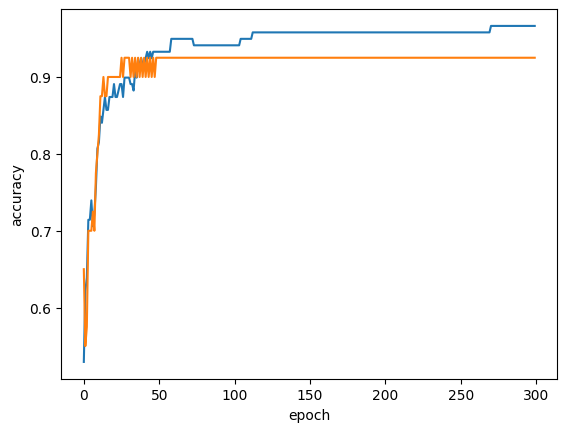

In [125]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [126]:
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled,y_train)

print(sc.score(train_scaled,y_train))
print(sc.score(test_scaled,y_test))

0.9495798319327731
0.925
